In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Define the paths for the datasets
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

# Define image dimensions
img_width = 180
img_height = 180

In [3]:
# Load and preprocess the training dataset
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32)

# Get the class names (categories)
data_cat = data_train.class_names

Found 3115 files belonging to 36 classes.


In [4]:
# Load and preprocess the validation dataset
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 351 files belonging to 36 classes.


In [5]:
# Load and preprocess the test dataset
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 359 files belonging to 36 classes.


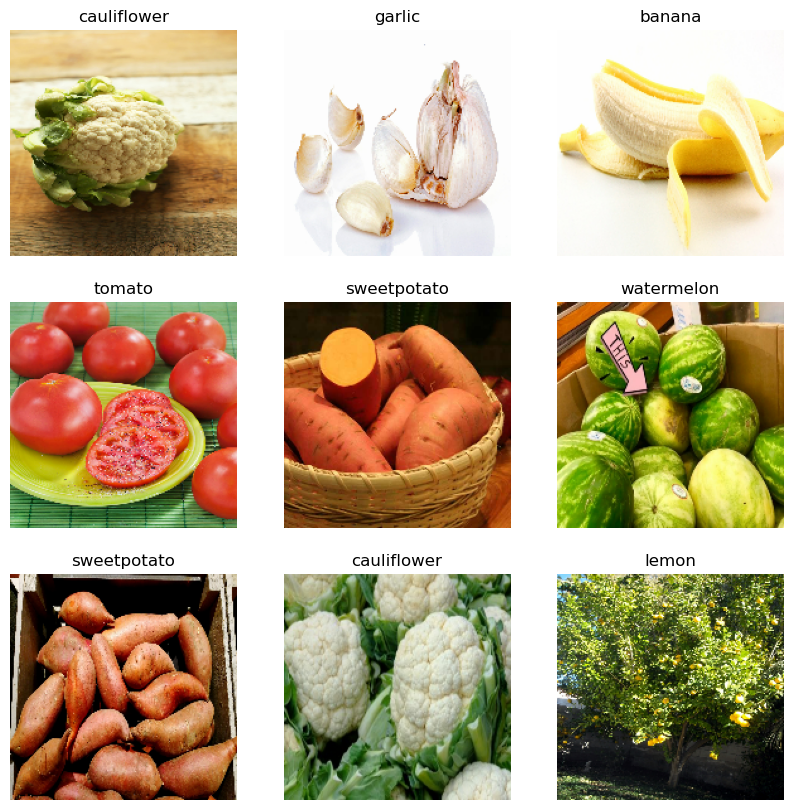

In [6]:
# Visualize some samples from the training dataset
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
plt.show()

In [7]:
# Define the CNN model
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [8]:
# Compile the model
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [9]:
# Train the model
epochs_size = 25
history = model.fit(data_train, validation_data = data_val, epochs = epochs_size, verbose = 1)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 371ms/step - accuracy: 0.0450 - loss: 4.5238 - val_accuracy: 0.3191 - val_loss: 2.5029
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 346ms/step - accuracy: 0.2486 - loss: 2.6458 - val_accuracy: 0.5527 - val_loss: 1.6996
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.4029 - loss: 2.0491 - val_accuracy: 0.6838 - val_loss: 1.1513
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 345ms/step - accuracy: 0.5924 - loss: 1.4823 - val_accuracy: 0.8348 - val_loss: 0.6937
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 342ms/step - accuracy: 0.7279 - loss: 0.9027 - val_accuracy: 0.9031 - val_loss: 0.4728
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 363ms/step - accuracy: 0.8368 - loss: 0.5633 - val_accuracy: 0.9288 - val_loss: 0.3608
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.8932 - loss: 0.3689 - val_accuracy: 0.9487 - val_loss: 0.2864
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 379ms/step - accuracy: 0.9557 - loss: 0.1787 - val_accu

Text(0.5, 1.0, 'Loss')

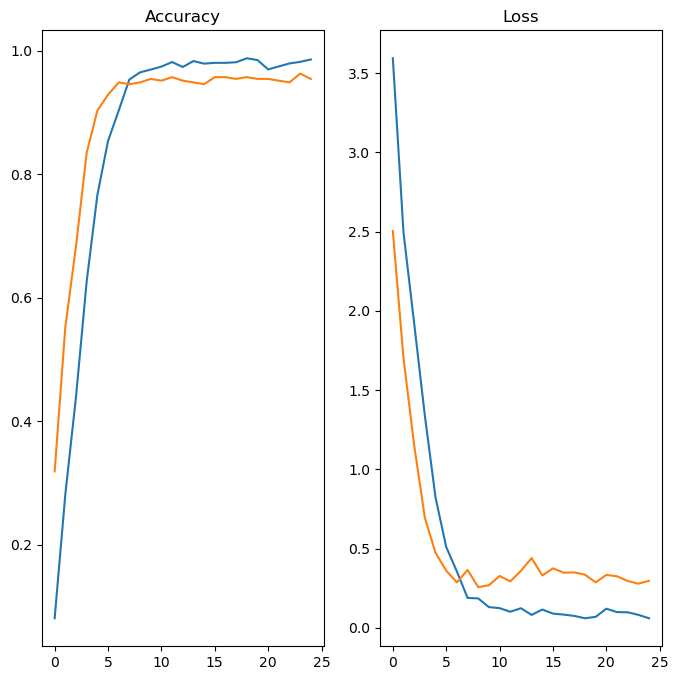

In [10]:
# Plot the training history
epochs_range = range(epochs_size)
plt.figure(figsize = (8, 8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation loss')
plt.title('Loss')

In [15]:
# Save the model
model.save('Fruits and Vegetable Classifier.keras')